In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

from keras.models import load_model
# from keras.layers import Reshape

Using TensorFlow backend.


In [23]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
# model = VGG19(include_top=True, weights='imagenet')
model = load_model(r'C:\Users\andyj\OneDrive\Documents\Bootcamp\xray\bodyparts\body_part_model.h5')

In [24]:
model.load_weights(r'C:\Users\andyj\OneDrive\Documents\Bootcamp\xray\bodyparts\body_part_model.h5')

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
__________

In [4]:
# Define default image size for VGG19
image_size = (256, 256)

In [5]:
# Load the image and resize to default image size
image_path = r'C:\Users\andyj\OneDrive\Documents\Bootcamp\xray\bodyparts\bodypart_test\shoulder\02693-3.png'

# C:\Users\andyj\OneDrive\Documents\Bootcamp\xray\bodyparts\bodypart_test\shoulder\image

#from keras_preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1./255)

# test_generator = datagen.flow_from_directory(image_path, target_size=(256,256), color_mode='grayscale', batch_size=1)

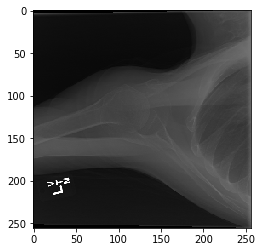

In [6]:
img = image.load_img(image_path, target_size=image_size, color_mode='grayscale')
plt.imshow(img)

In [13]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)


In [15]:
# Make predictions
predictions = model.predict(x)
# print('Predicted:', decode_predictions(predictions, top=3))


# plt.imshow(img)
# predictions

In [28]:
print(predictions)

[[0. 0. 0. 0. 0. 0. 0.]]


In [17]:
y_prob = model.predict(x) 
y_classes = y_prob.argmax(axis=-1)

In [18]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_classes

array([0], dtype=int64)

In [ ]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

In [ ]:
image_path = os.path.join("..", "Images", "bird2.jpg")
predict(image_path)